In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

/home/moshida/EUVlitho


In [2]:
# absorver
import numpy as np

with open("assets/masks/mask.bin", "rb") as f:
    packed = np.frombuffer(f.read(), dtype=np.uint8)
unpacked = np.unpackbits(packed)
mask = unpacked.reshape((2048, 2048))

In [5]:

from elitho.intensity import intensity

intensity_map = intensity(mask)

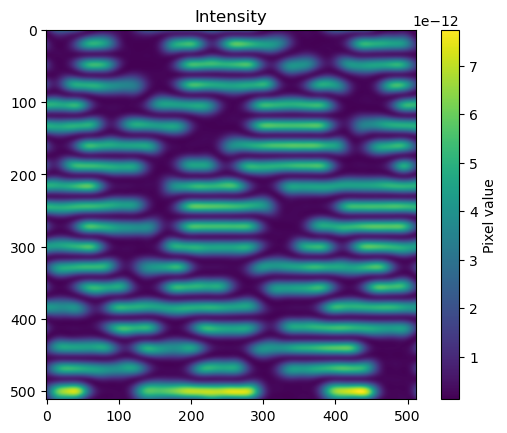

In [6]:
from matplotlib import pyplot as plt
plt.imshow(intensity_map)
plt.title("Intensity")
plt.colorbar(label="Pixel value")
plt.show()